# **Breast Cancer Classification Using Machine Learning Algorithms**

## **INTRODUCTION**

Classification is a core task in supervised machine learning, where the goal is to predict a categorical outcome based on a set of input features. It is widely used in real-world domains such as healthcare, finance, and fraud detection, where accurate decision-making is critical. In medical diagnostics, classification models help identify diseases by learning patterns from historical clinical data, reducing human error and supporting early intervention.

This assignment **focuses on applying multiple supervised classification algorithms to the Breast Cancer dataset available in the sklearn library**. The dataset contains numerical features derived from medical imaging, along with a binary target variable indicating whether a tumor is benign or malignant. By implementing and comparing different classification models, this assignment demonstrates how algorithm choice, data preprocessing, and model characteristics influence predictive performance.

## **OBJECTIVE:**

The primary objective of this assignment is **to evaluate the practical application of supervised machine learning classification techniques** on a real-world dataset. Specifically, this assignment aims to:

* **Load and preprocess the Breast Cancer dataset**, including handling missing values and applying appropriate feature scaling to ensure model compatibility and reliable results.

* Implement and understand five widely used classification algorithms: **Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Support Vector Machine (SVM), and K Nearest Neighbors (KNN)**.

* **Analyze how each algorithm works**, along with its strengths and limitations when applied to this dataset.

* **Compare the performance of all five models** using suitable evaluation metrics and identify which model performs best and which performs worst.

## **PROBLEM STATEMENT**

Predict whether a person has Breast Cancer based on medical attributes.

Target:

* **0 --> No Breast Cancer**
* **1 --> Has Breast Cancer**

# **DATASET OVERVIEW**

In [83]:
# Import Libraries

# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [84]:
# Read Dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### **Data Contains;**

1. **Mean Radius**:  *Average distance from the center to points on the perimeter.*
2. **Mean Texture:** *Average standard deviation of gray-scale values (measures color/shading variation).*
3. **Mean Perimeter:** *The average size of the core nuclear boundary.*
4. **Mean Area:** *The average surface area of the nuclei.*
5. **Mean Smoothness:** *Average local variation in radius lengths (how "jagged" or smooth the edge is).*
6. **Mean Compactness:** *Average of the formula $perimeter^2 / area - 1.0$.*
7. **Mean Concavity:** *Average severity of concave (indented) portions of the contour.*
8. **Mean Concave Points:** Average number of concave portions on the nuclear boundary.*italicised text*
9. **Mean Symmetry:** *Average balance of the nuclear shape.*
10. **Mean Fractal Dimension:** *Average "complexity" of the boundary based on a "coastline approximation".*
11. **Radius Error:** *Variability in radius size.*
12. **Texture Error:** *Variability in gray-scale shading.*
13. **Perimeter Error:** *Variability in the boundary length.*
14. **Area Error:** *Variability in the surface area.*
15. **Smoothness Error:** *Variability in the jaggedness of edges.*
16. **Compactness Error:** *Variability in how compact the nuclei are.*
17. **Concavity Error:** *Variability in the severity of indents.*
18. **Concave Points Error:** *Variability in the number of indents.*
19. **Symmetry Error:** *Variability in the shape balance.*
20. **Fractal Dimension Error:** *Variability in the boundary complexity.*
21. **Worst Radius:** *Largest average radius found in the sample.*
22. **Worst Texture:** *Largest variation in shading found in the sample.*
23. **Worst Perimeter:** *Largest boundary size found in the sample.*
24. **Worst Area:** *Largest surface area found in the sample.*
25. **Worst Smoothness:** *Most jagged/irregular edge variation found.*
26. **Worst Compactness:** *Most extreme compactness value found.*
27. **Worst Concavity:** *Most severe indentations found.*
28. **Worst Concave Points:** *Maximum number of concave portions found.*
29. **Worst Symmetry:** *Most extreme symmetry (or lack thereof) found.*
30. **Worst Fractal Dimension:** *Most complex boundary approximation found.*

In [86]:
# Basic Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [87]:
# Show the Number of Rows and Columns
print("No. of Rows    : ", df.shape[0])
print("No. of Columns : ", df.shape[1])

No. of Rows    :  569
No. of Columns :  31


* From the basic data inspection shows that the Breast Cancer dataset consists of **569 rows and 31 columns.**

* **All features are numerical and stored as float values**, except for the target variable, which represents the integer label.

In [88]:
# Check the Missing Values in the Dataset
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [89]:
# Check for Duplicate Values in the Dataset
print("Number of Duplicate Values: ", df.duplicated().sum())

Number of Duplicate Values:  0


Based on the initial data inspection, **NO MISSING VALUES AND DUPLICATE ENTRIES WERE FOUND** across any features in the dataset. Therefore, imputation techniques and drop duplicate procedures were not required.

The next step focuses on **understanding the fundamental structure and statistical Analysis of the data**.

### Data Understanding

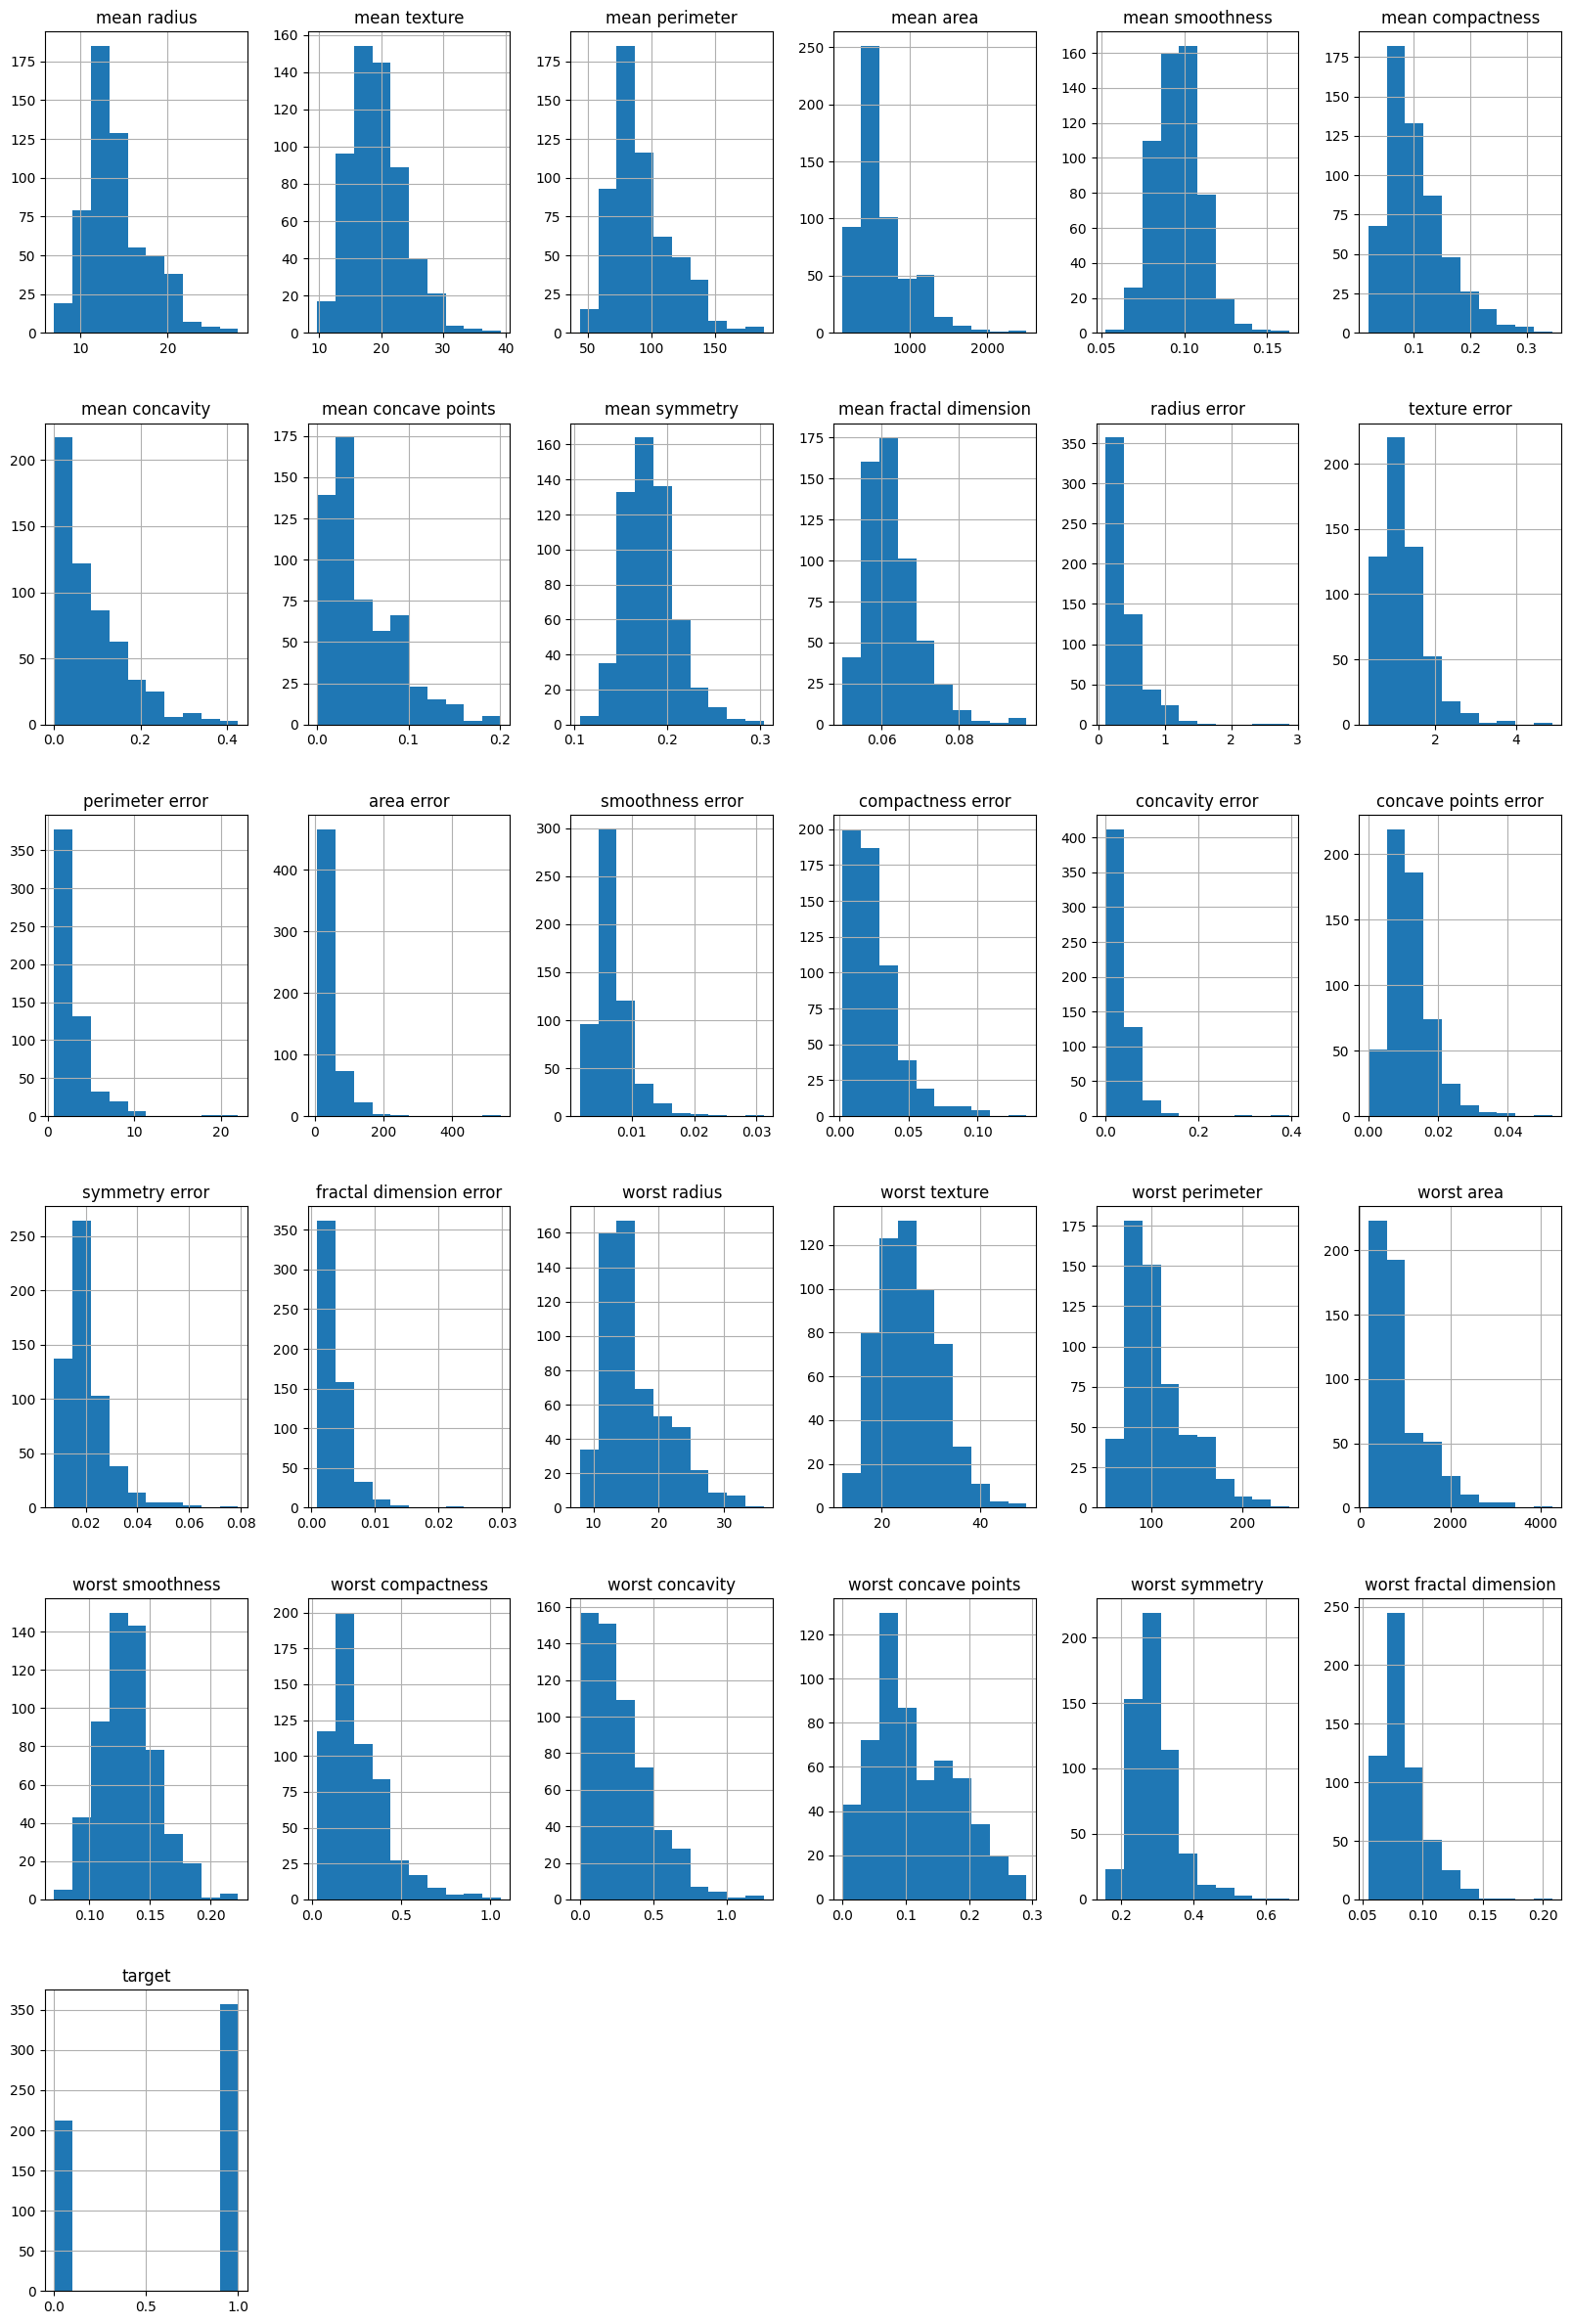

In [90]:
# Make Histograms to Analyse the Data in Each Features
viz = df
viz.hist(figsize=(20,30))
plt.show()

Each feature in the dataset is spread over a different range of values. Therefore, feature scaling is required to standardize the data and bring all features to a common scale.

In [91]:
corr_matrix = df.corr()

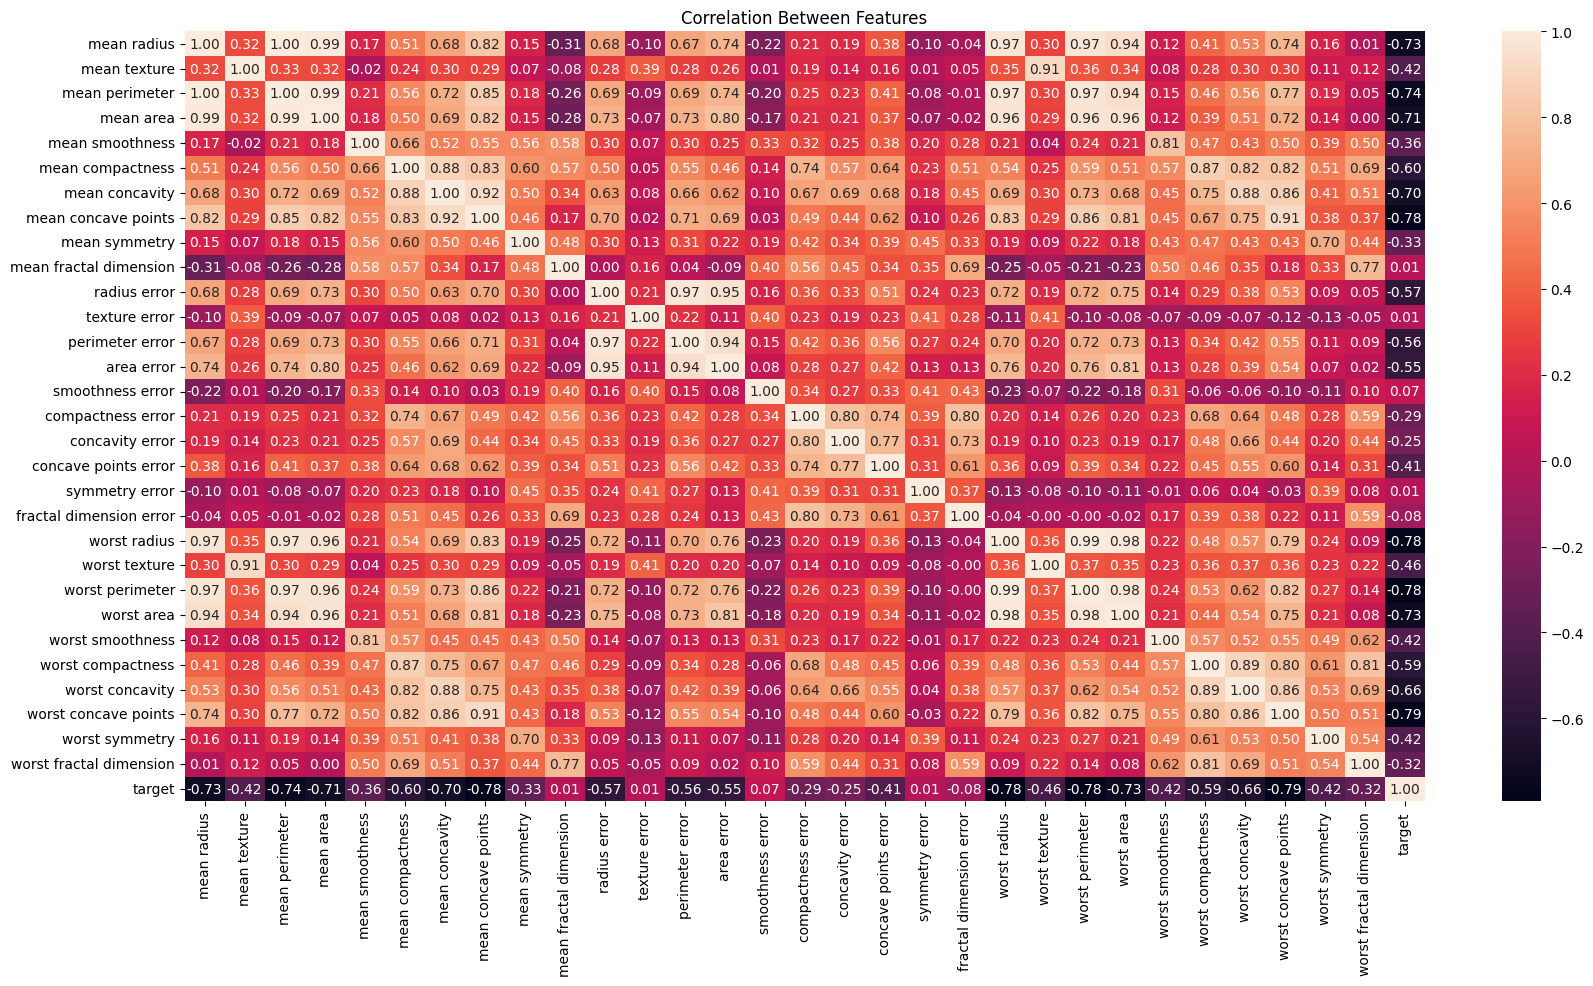

In [92]:
# Plot a Correlation Heatmap for Correlation Analysis
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

### Correlation Analysis

* This is a Correlation Heatmap, which illustrates the linear relationship between all numerical features in the dataset and the variable.
* A stromng positive correlations are observed among seceral size related features such as mean radius, mean perimeter, and mean area, as well as their corresponding worst measurements.
* These high correlations indicate the presence of multicollinearity, meaning multiple features capture similar information about tumor size.
* Several features show a strong correlation with the target variable, particularly:

    * mean concave points
    * worst concave points
    * mean concavity
    * worst radius
    * worst perimeter
* Features such as mean symmetry, mean fractal dimension, and some error-based features exhibit relatively weak correlations with the target variable.
* Although multicollinearity is present, all features were retained for model training since different classification algorithms handle correlated variables differently, and the correlation analysis confirms that the dataset contains informative features suitable for supervised classification with appropriate model selection and evaluation.

### Target Analysis

In [93]:
# Find the total count of each values in the Target
df["target"].value_counts()

,count
target,
1,357
0,212


The dataset contains **569 observations**. The target variable is binary, with 357 instances labeled as 1 and 212 instances labeled as 0.

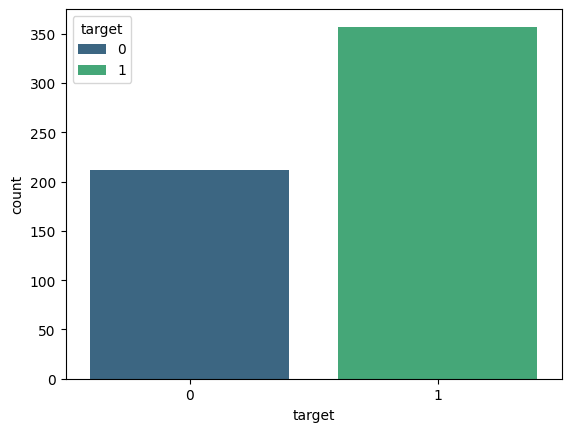

In [94]:
# Check and Analyze with Visualization
sns.countplot(x="target", data=df, palette="viridis", hue="target")
plt.show()

In [95]:
# Find the Percentage of Each Targets
count_no_bc = len(df[df["target"]== 0])
count_bc = len(df[df["target"]== 1])

percentage_no_bc = (count_no_bc)/ (len(df["target"]))*100
percentage_bc = (count_bc)/ (len(df["target"]))*100

print(f"\nPercentage of Patients Haven't Breast Cancer  : {percentage_no_bc:.2f}%")
print(f"Percentage of Patients Have Breast Cancer     : {percentage_bc:.2f}%\n")


Percentage of Patients Haven't Breast Cancer  : 37.26%
Percentage of Patients Have Breast Cancer     : 62.74%



1. The "target" feature contains a total of **569 observations.**
2. The target variable is **binary**, where:
  * **Class 0** represents patients **without breast cancer**
  * **Class 1** represents patients with **breast cancer**
3. Out of the total samples:
  * 212 data **(37.26%)** belong to class 0
  * 357 data **(62.74%)** belong to class 1
4. The count plot shows that class 1 has a higher number of observations compared to class 0.

In [96]:
# Statistical Analysis
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


From the statistical analysis, it is clear that the features in the dataset have **very different value ranges**. If this is not handled properly, **it can negatively affect model training and lead to inaccurate predictions.**

# **MODEL BUILDING**

In [99]:
# Define Features and Target
X = df.drop("target", axis=1)
y = df["target"]

### Train Test Split

In [100]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [101]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

**FEATURE **SCALING** is applied** to all numerical column variables **to bring them to a common scale**. This is necessary for algorithms such as Logistic Regression, SVM, KNN. This will improves the model performance. The "target" column is excluded as it is considered as **Catagorical**.

In [102]:
# Show DataFrame after Feature Scaling.
x_df = pd.DataFrame(X_train_scaled)
x_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.072001,-0.658425,-1.088080,-0.939274,-0.135940,-1.008718,-0.968359,-1.102032,0.281062,-0.113231,...,-1.034094,-0.623497,-1.070773,-0.876534,-0.169982,-1.038836,-1.078995,-1.350527,-0.352658,-0.541380
1,1.748743,0.066502,1.751157,1.745559,1.274468,0.842288,1.519852,1.994664,-0.293045,-0.320180,...,1.228342,-0.092833,1.187467,1.104386,1.517001,0.249655,1.178594,1.549916,0.191078,-0.173739
2,-0.974734,-0.931124,-0.997709,-0.867589,-0.613515,-1.138154,-1.092292,-1.243358,0.434395,-0.429247,...,-0.973231,-1.036772,-1.008044,-0.834168,-1.097823,-1.167260,-1.282241,-1.707442,-0.307734,-1.213033
3,-0.145103,-1.215186,-0.123013,-0.253192,0.664482,0.286762,-0.129729,-0.098605,0.555635,0.029395,...,-0.251266,-1.369643,-0.166633,-0.330292,0.234006,0.096874,-0.087521,-0.344838,0.242198,-0.118266
4,-0.771617,-0.081211,-0.803700,-0.732927,-0.672282,-1.006099,-0.798502,-0.684484,0.737495,-0.457213,...,-0.801135,0.079230,-0.824381,-0.741830,-0.911367,-0.984612,-0.933190,-0.777604,0.555118,-0.761639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.346953,0.718708,0.305215,0.180108,-0.416385,0.024898,-0.434051,-0.404147,-0.282347,0.048971,...,0.340577,0.383156,0.216376,0.188430,-0.098951,0.473190,0.400659,0.130349,0.412600,0.749172
451,1.562791,-0.078938,1.572901,1.649786,1.400929,1.128468,1.598229,1.488000,-0.050565,0.377571,...,2.046849,0.095311,1.944436,2.143641,0.762298,0.984755,1.555508,1.260606,0.091935,0.834556
452,0.398448,1.068673,0.507514,0.240184,1.646411,1.554933,1.393715,0.947901,0.002923,1.120068,...,0.195764,1.717856,0.333992,0.073098,1.814443,1.517608,1.458150,1.534925,0.161645,1.237548
453,0.853314,-0.038033,0.905480,0.715275,1.333979,0.997536,1.246759,1.560013,1.158269,0.060158,...,0.716251,-0.121779,0.810491,0.579327,1.685699,0.870796,1.044148,2.104551,0.310359,0.362496


In [103]:
# Statistical Data Analysis After Feature Scaling.
x_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,455.0,-4.337434e-15,1.001101,-2.027220,-0.695806,-0.228066,0.478550,4.017353
1,455.0,2.240942e-15,1.001101,-2.167362,-0.737962,-0.097118,0.559633,4.552410
2,455.0,-7.437274e-16,1.001101,-1.980187,-0.697991,-0.231210,0.503368,4.018733
3,455.0,1.503071e-16,1.001101,-1.465734,-0.675898,-0.309785,0.352644,5.370416
4,455.0,5.223660e-15,1.001101,-2.503730,-0.721006,-0.037747,0.645884,3.610271
5,455.0,-2.775802e-15,1.001101,-1.580330,-0.750408,-0.241269,0.490642,4.517740
6,455.0,-7.046866e-16,1.001101,-1.092292,-0.749272,-0.357634,0.526674,4.134445
7,455.0,6.031805e-16,1.001101,-1.243358,-0.723320,-0.404147,0.655219,3.931305
8,455.0,-3.263812e-15,1.001101,-2.660791,-0.672812,-0.089790,0.523542,4.399657
9,455.0,-3.031519e-15,1.001101,-1.798182,-0.717996,-0.192935,0.479647,4.840942


In [104]:
# Correlation Analysis
corr_matrix = df.corr()

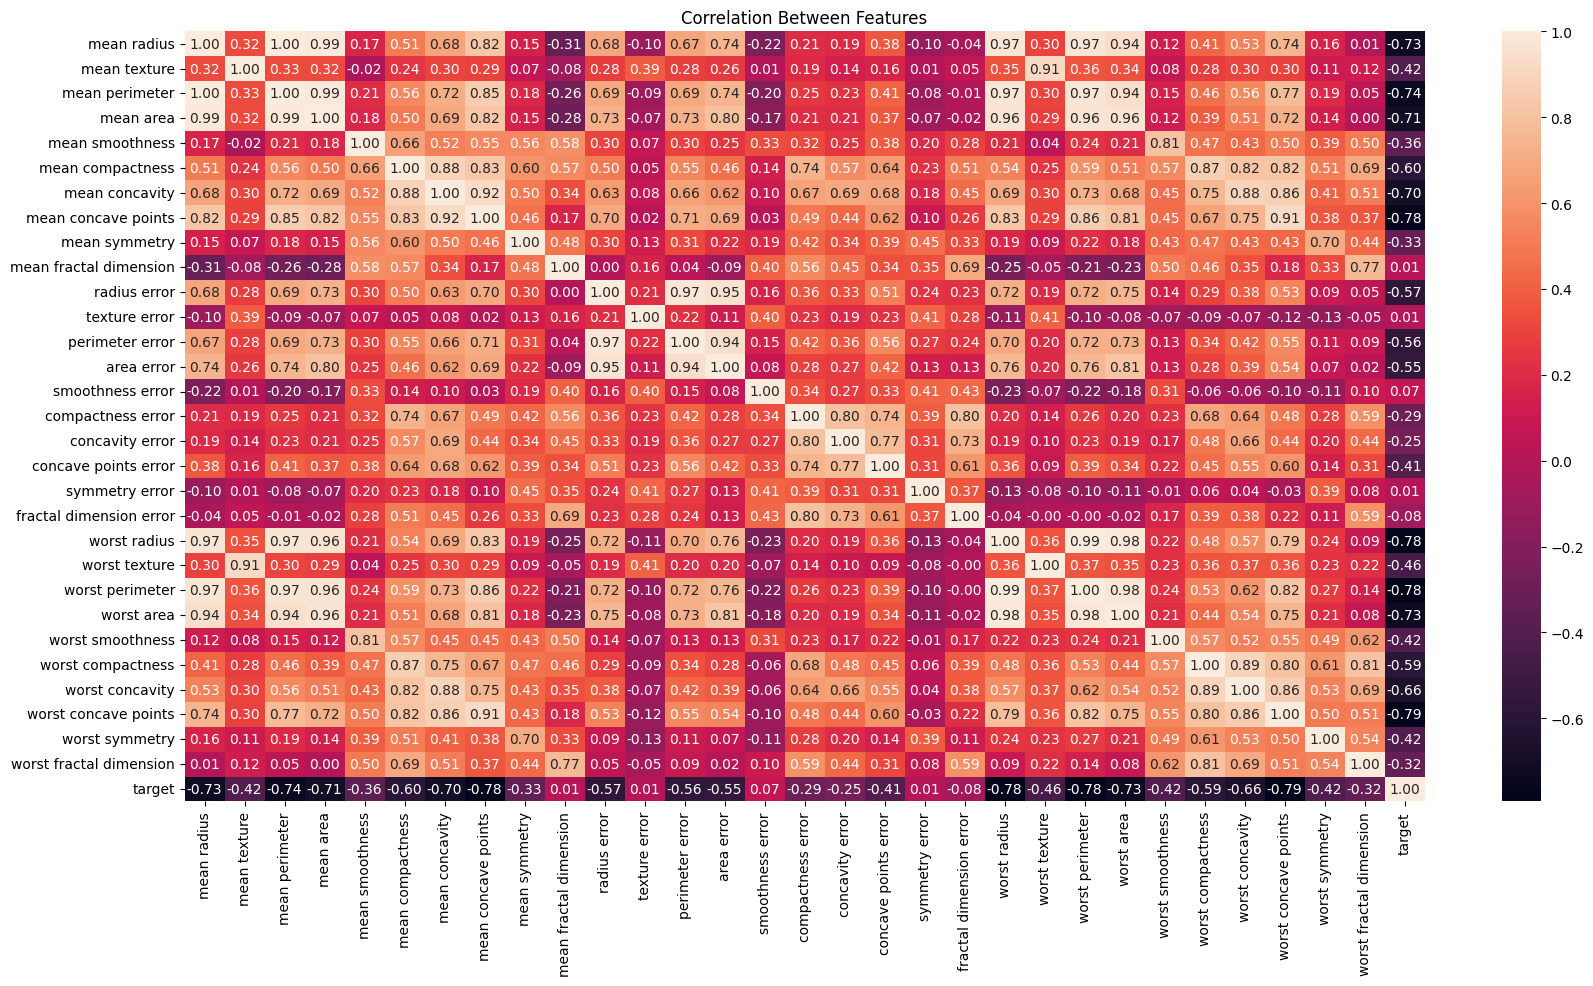

In [105]:
# Plot a Correlation Heat Map
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

## **CLASSIFICATION ALGORITHM IMPLEMENTATION**

### 1. Logistic Regression

**How it works:**

Logistic Regression looks at the input features and calculates the probability that a sample belongs to a particular class. Based on this probability, it decides whether the tumor is benign or malignant.

**Why it is suitable for:**
* The dataset has numerical and continous medical measurements.
* The problem has only two outcomes.
* It gives reliable results and is easy to interpret.

In [106]:
# Model Building and Training
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [107]:
# Model Prediction
lr_y_pred = lr.predict(X_test_scaled)
lr_y_prob = lr.predict_proba(X_test_scaled)[:,1]

In [108]:
# Model Evaluation
print("Accuracy: ", accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))

Accuracy:  0.9824561403508771
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



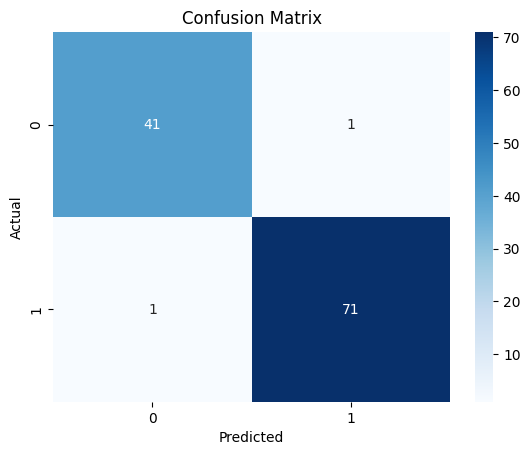

In [109]:
# Plot a Confusion Metrics
lr_cm = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### 2. Decision Tree Classifier

**How it works:**

A Decision Tree makes decisions by asking a series of simple yes or no questions about the data. Each question splits the data into smaller groups until a final decision is reached.

**Why it is suitable for:**

* It can handle complex patterns in medical data.
* No need to scale the features.
* Easy to understand and explain.

In [110]:
# Model Building and Training
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [111]:
# Model Prediction
dt_y_pred = dt.predict(X_test_scaled)

In [112]:
# Model Evaluation
print("Accuracy: ", accuracy_score(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

Accuracy:  0.9210526315789473
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        42
           1       0.94      0.93      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [113]:
# Control Overfttng
dt_pruned = DecisionTreeClassifier(
     max_depth=4,
     min_samples_split=10,
     random_state=42
 )
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42)

In [114]:
# Model Evaluaton After Cntol Overfitting
dt_y_pred_pruned = dt_pruned.predict(X_test)
print("Accuracy:", accuracy_score(y_test, dt_y_pred_pruned))
print(classification_report(y_test, dt_y_pred_pruned))


Accuracy: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



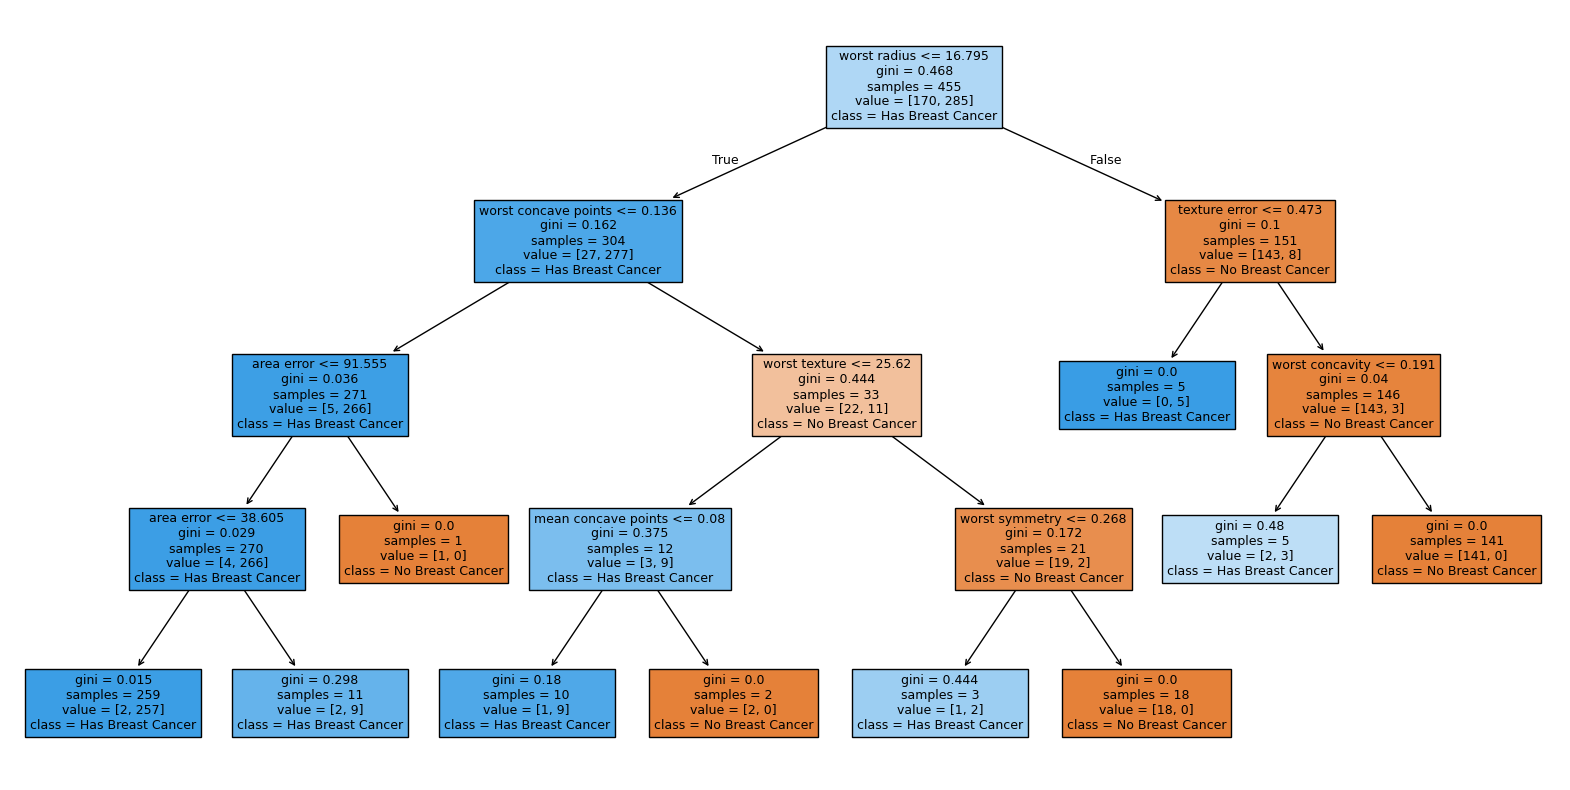

In [115]:
# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(
    dt_pruned,
    feature_names=X.columns,
    class_names=["No Breast Cancer", "Has Breast Cancer"],
    filled=True
)
plt.show()

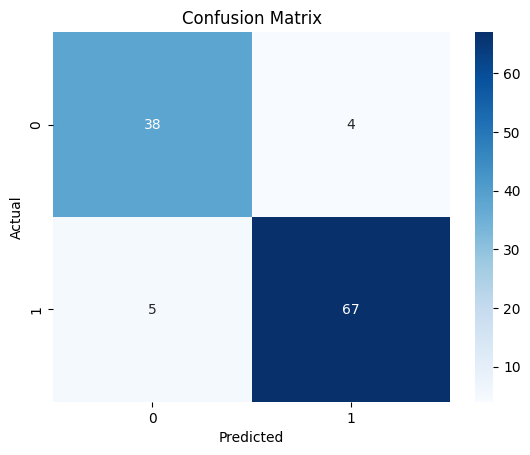

In [116]:
# Plot a Confusion Metrics
dt_cm = confusion_matrix(y_test, dt_y_pred)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### 3. Random Forest Classifier

**How it works:**

Random Forest builds many decision trees and combines their results. Each tree makes its own prediction, and the final result is chosen by majority voting.

**Why it is suitable for:**

* It reduces overfitting compared to a single decision tree.
* More accurate than a single decision tree.
* Reduces overfitting.
* Works well with many features.

In [117]:
# Model Building and Training
rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    random_state=42
)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

In [118]:
# Model Prediction
rf_y_pred = rf.predict(X_test_scaled)

In [119]:
# Model Evaluation
print("Accuracy: ", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

Accuracy:  0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



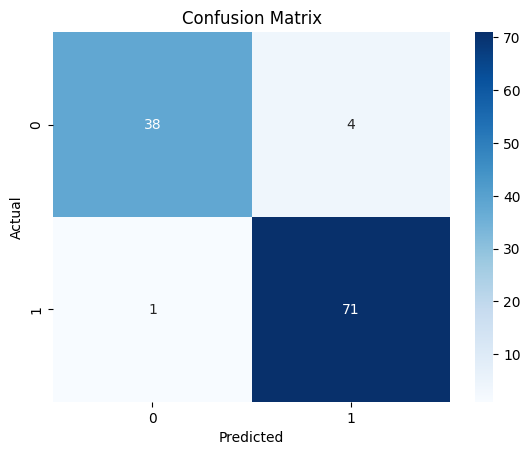

In [120]:
# Plot a Confusion Metrics
rf_cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [121]:
# Find the Top 10 Important Features frm the Dataset
feature_importance = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

,0
worst concave points,0.129165
worst radius,0.112673
mean perimeter,0.096197
worst area,0.093541
mean concave points,0.093144
mean concavity,0.076308
worst perimeter,0.067391
mean radius,0.044342
worst concavity,0.043727
mean area,0.039908


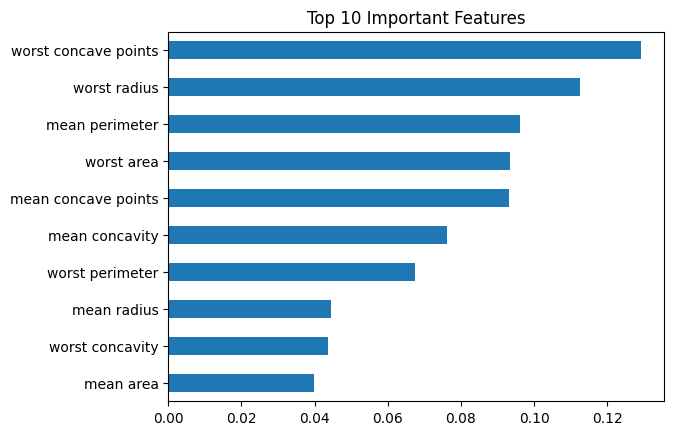

In [122]:
# Show in Graphically
feature_importance.head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()

### 4. Support Vector Machine (SVM)

**How it works:**

SVM separates the data into two groups by drawing the best possible boundary between them. It tries to keep this boundary as far away from both groups as possible.

**Why it is suitable for:**
* It is very effective in high-dimensional spaces.
* Effective when the data is clearly separable.
* Handles many features well.
* Produces strong classification performance.

In [123]:
# Model Building and Training
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train_scaled, y_train)

SVC(C=1)

In [124]:
# Model Prediction
svm_y_pred = svm.predict(X_test_scaled)

In [125]:
# Model Evaluation
print(f"Accuracy: ", accuracy_score(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

Accuracy:  0.9736842105263158
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



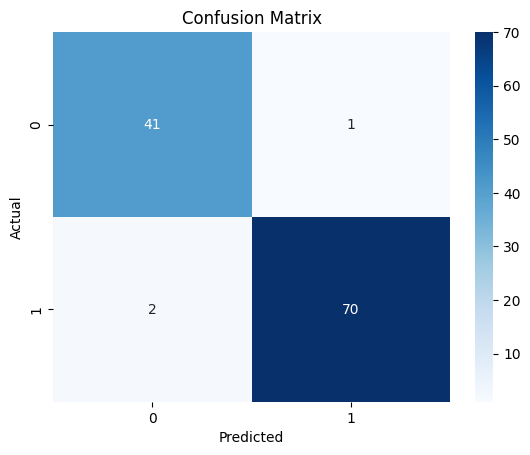

In [126]:
# Plot a Confusion Metrics
svm_cm = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### 5. k-Nearest Neighbors (KNN)

**How it works:**

k-NN compares a new data point with the closest data points in the dataset. It assigns the class that most of the nearby points belong to.

**Why it is suitable for:**

* It is simple and effective for well-structured numeric data.
* Works well with numerical data.
* Useful for comparison with other models.

In [127]:
# Model Building and Training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [128]:
# Model Prediction
knn_y_pred = knn.predict(X_test_scaled)

In [129]:
# Model Evaluation
print(f"Accuracy: ", accuracy_score(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

Accuracy:  0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



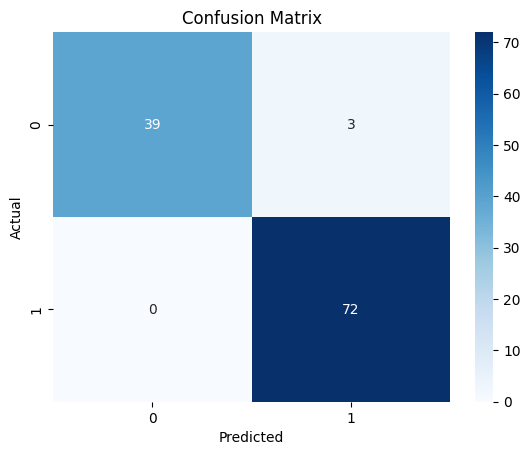

In [130]:
# Plot a Confusion Metrics
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **MODEL EVALUATION**

In [131]:
print("\nLOGISTIC REGRESSION: ")
print(f"Accuracy: {accuracy_score(y_test, lr_y_pred)*100:.2f}%")
print(classification_report(y_test, lr_y_pred))

print("\nDECISION TREE CLASSIFIER: ")
print(f"Accuracy: {accuracy_score(y_test, dt_y_pred_pruned)*100:.2f}%")
print(classification_report(y_test, dt_y_pred_pruned))

print("\nRANDOM FOREST CLASSIFIER: ")
print(f"Accuracy: {accuracy_score(y_test, rf_y_pred)*100:.2f}%")
print(classification_report(y_test, rf_y_pred))

print("\nSUPPORT VECTOR MACHINE (SVM): ")
print(f"Accuracy: {accuracy_score(y_test, svm_y_pred)*100:.2f}%")
print(classification_report(y_test, svm_y_pred))

print("\nK-NEAREST NIGHBORS (KNN): ")
print(f"Accuracy: {accuracy_score(y_test, knn_y_pred)*100:.2f}%")
print(classification_report(y_test, knn_y_pred))


LOGISTIC REGRESSION: 
Accuracy: 98.25%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


DECISION TREE CLASSIFIER: 
Accuracy: 92.98%
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


RANDOM FOREST CLASSIFIER: 
Accuracy: 95.61%
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       11

1. **Precision**   : *Precision measures how many of the predicted positive cases are actually positive.*
2. **Recall**      : *It measures how many actual positives the model succesfully identified.*
3. **F1-Score**    : *It is the harmonic mean of the presition and recall.*
4. **Support**      : *It is simply the number of true instance of each class in the test set.*

## **Model Performance Analysis and Comparison**

* Five classification algorithms were evaluated using accuracy, precision, recall, and F1-score on the test dataset.
* **Logistic Regression achieved the highest accuracy (98.25%)**, along with balanced precision, recall, and F1-scores across both classes. This indicates strong linear separability in the dataset and effective generalization.
* **Support Vector Machine (SVM) and k-Nearest Neighbors (k-NN) both achieved an accuracy of 97.37%**, demonstrating excellent performance.
    * SVM showed well-balanced precision and recall, indicating robust class separation after feature scaling.
    * k-NN achieved perfect precision for class 0 and perfect recall for class 1, showing strong local neighborhood classification but with slightly higher sensitivity to class distribution.
* Random Forest Classifier achieved an accuracy of 95.61%, performing well overall but slightly lower than Logistic Regression and SVM. This suggests that while ensemble methods handle feature interactions effectively, they may not outperform simpler models on this dataset.
* Decision Tree Classifier recorded the lowest accuracy (92.98%), indicating comparatively weaker generalization and potential overfitting to the training data.
* Overall, linear and distance-based models performed better than tree-based models, highlighting that the breast cancer dataset is well-structured, numerically scaled, and largely linearly separable.

# **CONCLUSION** (Best vs Worst)

In ths project, different machine learning classification algorthms were used to predict whether breast cancer is benign or malinant based on medical test values. The dtaset contains numerical features and to possible outcomes, which makes it suitable foe classifications.

Logistic Regression gave a strong basic result and worked well because the data is well structured. Decision Tree was easy to nderstand but sometimes made mistakes by learning the training data too closely. Random Forest improved the results by combaining many decision trees and gving more reliable predictions.

Support Vector Machine performed we by clearly seperating the two classes after scaling the data. k-Nearest Neighbor also gave good results bu depended heavily on distance between values and required proper scaling.

Overall, Random Forest provided the most accurate and consistant predictions for this dataset. Ths shows that choosing the right algorithm and preparing teh data properly are important for building reliable medical prediction models.

### **Best and Worst Performing Algorithm**

* **Best Performing Algorithm**:

**Logistic Regression:** It has the highest accuracy (98.25%) and most balanced performance across all evaluated metrics.
* **Worst Performing Algorithm:**

**Decision Tree:** It showed the lowest accuracy (92.98%) and comparitively weaker precision and recall.